## test_sp_toolbox.ipynb
### copied from SP's toolbox.ipynb 05/06/20
- https://github.com/pothiers/pyphi/blob/sp-tools/notebooks/toolbox.ipynb

In [10]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout

import toolbox as tb
import pyphi

edges=[(0, 2), (1, 0), (1, 2), (2, 0), (2, 1)] n_list=[0, 1, 2]
Name: None
Type: DiGraph
Number of nodes: 3
Number of edges: 5
Average in degree:   1.6667
Average out degree:   1.6667
A(0): 2,or_func
B(1): 2,copy_func
C(2): 2,xor_func


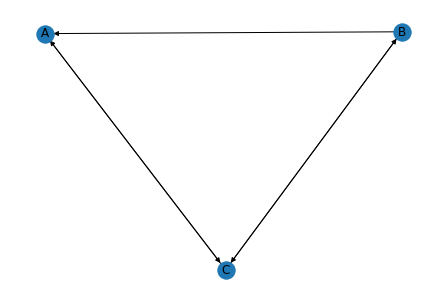

In [11]:
ledges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
i,j = zip(*ledges)            
indexLUT = dict([(l,ord(l)-ord('A')) for l in sorted(set(i+j))])
edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
net = tb.Net(edges=edges)
net.get_node('A').func = tb.or_func
net.get_node('B').func = tb.copy_func
net.get_node('C').func = tb.xor_func
print(nx.info(net.graph))
net.draw()
print(net.get_node('A'))
print(net.get_node('B'))
print(net.get_node('C'))

In [12]:
df=net.tpm
df

,A,B,C
000,0,0,0
100,0,0,1
010,1,0,1
110,1,0,0
001,1,1,0
101,1,1,1
011,1,1,1
111,1,1,0


In [13]:
df.to_numpy()

array([[0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

In [14]:
print(f"Probability distributions: {dict([(l,net.node_pd(net.get_node(l))) for l in list('ABC')])}")

Probability distributions: {'A': [0.25, 0.75], 'B': [0.5, 0.5], 'C': [0.5, 0.5]}


In [15]:
net.node_state_counts(net.get_node('A'))

Counter({0: 1, 1: 3})

In [16]:
net.eval_node(net.get_node('A'),(0,1,1))

1

In [17]:
net.pyphi_network

Network([[[[0. 0. 0.]
   [1. 1. 0.]]

  [[1. 0. 1.]
   [1. 1. 1.]]]


 [[[0. 0. 1.]
   [1. 1. 1.]]

  [[1. 0. 0.]
   [1. 1. 0.]]]], cm=[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]])

In [18]:
net.node_labels

['A', 'B', 'C']

In [19]:
net.phi('100')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0]


2.3125

In [20]:
net.phi('110')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 1, 0]


0.1875

In [22]:
net.phi('001')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 1]


0.1875

In [23]:
net.phi('111')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 1, 1]


0.1875

In [24]:
net.phi('000')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0]


0.1875

## 'STOP HERE' in SP's notebook: but I successfully ran everything below

edges=[(0, 3), (1, 4), (2, 4), (2, 5), (3, 2), (3, 4), (4, 0), (4, 1), (4, 5), (4, 6), (5, 2), (6, 1)] n_list=[0, 1, 2, 3, 4, 5, 6]
Name: None
Type: DiGraph
Number of nodes: 7
Number of edges: 12
Average in degree:   1.7143
Average out degree:   1.7143


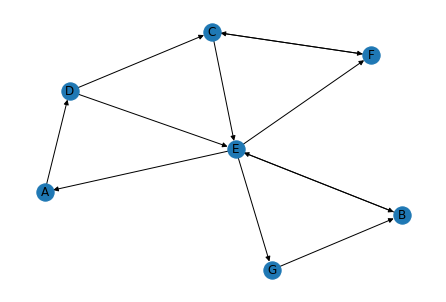

In [26]:
ledges = [('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), 
          ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), 
          ('E', 'F'), ('E', 'G'), ('F', 'C'), ('G', 'B')]
i,j = zip(*ledges)            
indexLUT = dict([(l,ord(l)-ord('A')) for l in sorted(set(i+j))])
edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
net = tb.Net(edges=edges)
print(nx.info(net.graph))
net.draw()


In [27]:
#net.get_node('E').num_states = 3    # calc cannot handle this
#net.get_node('E').func = tb.tri_func
net.get_node('E').num_states = 2
net.get_node('E').func = tb.or_func
print(net.get_node('E'))
print(net.get_node('A'))

E(4): 2,or_func
A(0): 2,maz_func


In [28]:
net.node_labels

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [29]:
net.cm

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [30]:
net.tpm

,A,B,C,D,E,F,G
0000000,0,0,0,0,0,0,0
1000000,0,0,0,1,0,0,0
0100000,0,0,0,0,1,0,0
1100000,0,0,0,1,1,0,0
0010000,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1101111,1,1,1,1,1,1,1
0011111,1,1,1,0,1,1,1
1011111,1,1,1,1,1,1,1
0111111,1,1,1,0,1,1,1


In [31]:
net.phi() # 0001000 => 0.25

Computing concepts:   0%|          | 0/127 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 1, 0, 1, 1, 0]


0.005102

In [32]:
net.phi('0001000')

Computing concepts:   0%|          | 0/127 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 0, 1, 0, 0, 0]


0.25